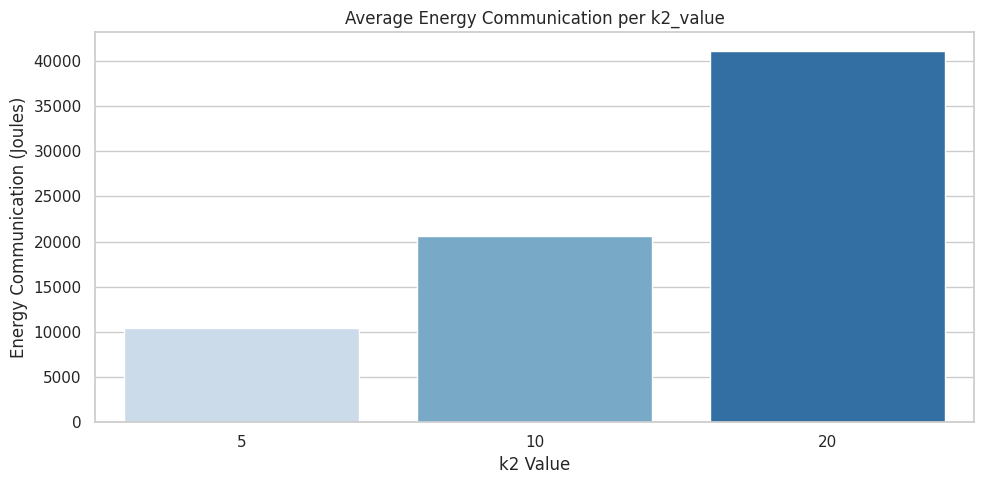

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both CSV files
df1  = pd.read_csv("aggregated_experiment_data.csv")
df2  = pd.read_csv("final_experiment_summary.csv")

palette_k1 = sns.color_palette("Blues", df["k2_value"].nunique())

sns.set(style="whitegrid", color_codes=True)

# Merge on both 'experiment_id' and 'log_file'
merged_df = pd.merge(df1, df2, on=['experiment_id', 'log_file'], how='inner')

# Extract relevant columns
df = merged_df[['k2_value', 'energy_communication']]

# Group by k2_value and take mean of energy_communication
grouped_df = df.groupby('k2_value', as_index=False).mean()

# Plot with scientific color palette and no warning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped_df, 
    x='k2_value', 
    y='energy_communication', 
    hue='k2_value',         # Assign hue to trigger color mapping
    palette=palette_k1,      # Scientific, perceptually uniform
    legend=False            # Turn off the legend
)
plt.title("Average Energy Communication per k2_value")
plt.xlabel("k2 Value")
plt.ylabel("Energy Communication (Joules)")
plt.tight_layout()
plt.savefig("plots/communication_energy_k2.png", dpi=600, bbox_inches='tight')
plt.show()
